# Laboratorio 1 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2 as cv

### 1 . Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

In [2]:
image = plt.imread('assets/valley.jpg')

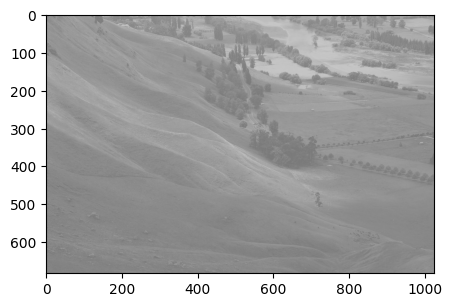

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

In [4]:
image = image[:,:,0]

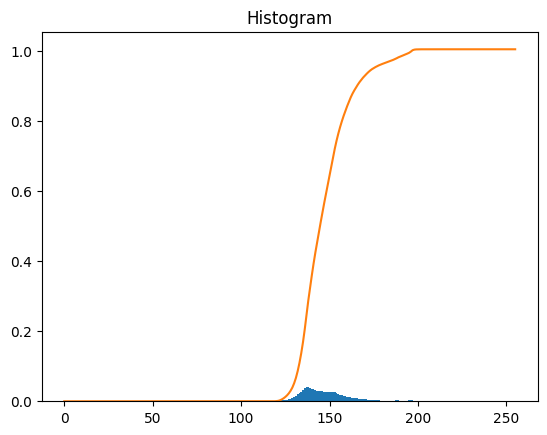

In [5]:
plt.hist(image.ravel(), bins=256, range=(0, 255), density=True)
hist, _= np.histogram(image, bins=256, range=(0, 255), density=True)
cdf = np.cumsum(hist)
plt.plot(cdf)
plt.title("Histogram")
plt.show()

#### Equalización de la imagen

In [6]:
def equalize_image(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255), density=True)
    cdf = np.cumsum(hist)
    cdf = (cdf * 255).astype('uint8')
    return cdf[image]

In [7]:
image_equalized = equalize_image(image)

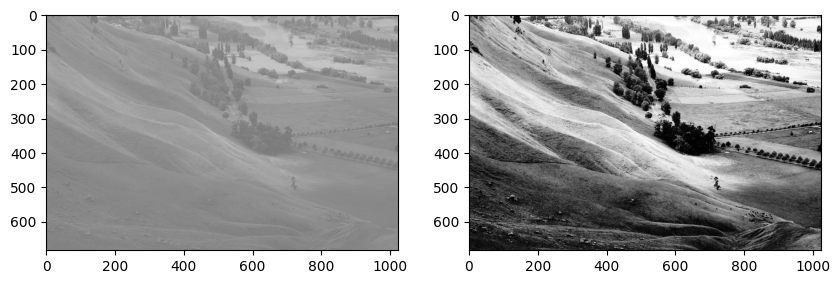

In [23]:
image = plt.imread('assets/valley.jpg')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(image_equalized, cmap='gray')
plt.show()

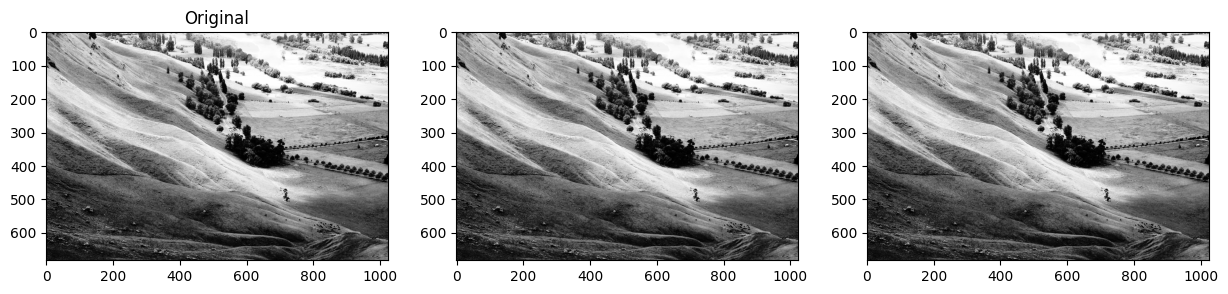

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_equalized, cmap='gray')


# OpenCV
image = cv.imread('assets/valley.jpg', cv.IMREAD_GRAYSCALE)
image_equalized = cv.equalizeHist(image)
plt.subplot(1,3,2)
plt.imshow(image_equalized, cmap='gray')


# skimage
image = ski.io.imread('assets/valley.jpg', as_gray=True)
image_equalized = ski.exposure.equalize_hist(image)
plt.subplot(1,3,3)
plt.imshow(image_equalized, cmap='gray')

plt.show()